# Section 6: Decision Tree Regression

Decision tree builds regression or classification models in the form of a tree structure. It breaks down a dataset into smaller and smaller subsets while at the same time an associated decision tree is incrementally developed. The final result is a tree with decision nodes and leaf nodes. A decision node has two or more branches, each representing values for the attribute tested. Leaf node represents a decision on the numerical target. The topmost decision node in a tree which corresponds to the best predictor called root node.

![DecisionTree](../media/DecisionTree.png)

Note : Tree based models are not designed to work with very sparse features. When dealing with sparse input data (e.g. categorical features with large dimension), we can either pre-process the sparse features to generate numerical statistics, or switch to a linear model, which is better suited for such scenarios.

# Importing the libraries 

In [1]:
import numpy as np
import pandas as pd

# Load Data

In [2]:
dataset=pd.read_csv('../data/mushrooms.csv') 
dataset.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [3]:
dataset.describe()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,...,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,...,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,...,s,w,w,p,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,...,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


In [4]:
# verify that there are no null columns in the dataset
dataset[dataset.isnull().any(axis=1)]

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat


In [5]:
y = dataset['class']
x = dataset.drop(['class'], axis=1)

In [6]:
print(x.head())

  cap-shape cap-surface cap-color bruises odor gill-attachment gill-spacing  \
0         x           s         n       t    p               f            c   
1         x           s         y       t    a               f            c   
2         b           s         w       t    l               f            c   
3         x           y         w       t    p               f            c   
4         x           s         g       f    n               f            w   

  gill-size gill-color stalk-shape  ... stalk-surface-below-ring  \
0         n          k           e  ...                        s   
1         b          k           e  ...                        s   
2         b          n           e  ...                        s   
3         n          n           e  ...                        s   
4         b          k           t  ...                        s   

  stalk-color-above-ring stalk-color-below-ring veil-type veil-color  \
0                      w                    

In [7]:
print(y.head())

0    p
1    e
2    e
3    p
4    e
Name: class, dtype: object


# Data Preprocessing

In [8]:
# use LabelEncoder to replace purchased (dependent variable) with 0 and 1 
from sklearn.preprocessing import LabelEncoder
y= LabelEncoder().fit_transform(y)
print(y[:10])

[1 0 0 1 0 0 0 0 1 0]


In [9]:
x = pd.get_dummies(x)
print(x.head())

   cap-shape_b  cap-shape_c  cap-shape_f  cap-shape_k  cap-shape_s  \
0        False        False        False        False        False   
1        False        False        False        False        False   
2         True        False        False        False        False   
3        False        False        False        False        False   
4        False        False        False        False        False   

   cap-shape_x  cap-surface_f  cap-surface_g  cap-surface_s  cap-surface_y  \
0         True          False          False           True          False   
1         True          False          False           True          False   
2        False          False          False           True          False   
3         True          False          False          False           True   
4         True          False          False           True          False   

   ...  population_s  population_v  population_y  habitat_d  habitat_g  \
0  ...          True         False  

# Splitting the dataset into training and test set  

In [10]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state = 0) # func returns train and test data. It takes dataset and then split size test_size =0.3 means 30% data is for test and rest for training and random_state 


In [11]:
print(x_train.head())

      cap-shape_b  cap-shape_c  cap-shape_f  cap-shape_k  cap-shape_s  \
5314        False        False        False        False        False   
2075        False        False        False        False        False   
5165        False        False         True        False        False   
1155         True        False        False        False        False   
4448        False        False        False        False        False   

      cap-shape_x  cap-surface_f  cap-surface_g  cap-surface_s  cap-surface_y  \
5314         True          False          False           True          False   
2075         True          False          False           True          False   
5165        False          False          False           True          False   
1155        False          False          False          False           True   
4448         True          False          False          False           True   

      ...  population_s  population_v  population_y  habitat_d  habitat_g 

In [12]:
print(x_test.head())

      cap-shape_b  cap-shape_c  cap-shape_f  cap-shape_k  cap-shape_s  \
380         False        False        False        False        False   
3641        False        False         True        False        False   
273         False        False        False        False        False   
1029        False        False        False        False        False   
684         False        False        False        False        False   

      cap-shape_x  cap-surface_f  cap-surface_g  cap-surface_s  cap-surface_y  \
380          True          False          False          False           True   
3641        False          False          False          False           True   
273          True          False          False          False           True   
1029         True          False          False           True          False   
684          True           True          False          False          False   

      ...  population_s  population_v  population_y  habitat_d  habitat_g 

In [13]:
print(y_train[:10])

[1 0 1 0 1 0 1 0 0 1]


In [14]:
print(y_test[:10])

[1 0 0 0 0 0 1 1 0 1]


# Build Model 

In [15]:
from sklearn.tree import DecisionTreeRegressor 
regressor = DecisionTreeRegressor(random_state = 0, max_depth=4)
regressor.fit(x_train,y_train)

,criterion,'squared_error'
,splitter,'best'
,max_depth,4
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,ccp_alpha,0.0


In [16]:
y_pred= regressor.predict(x_test)

# Evaluate Model 

In [17]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error, confusion_matrix, classification_report

print("Decision Tree Regression Model Performance")
print("R2 Score: ", r2_score(y_test,y_pred))
print("Mean Absolute Error: ", mean_absolute_error(y_test,y_pred))
print("Mean Squared Error: ", mean_squared_error(y_test,y_pred))

Decision Tree Regression Model Performance
R2 Score:  0.9659650561075784
Mean Absolute Error:  0.013897577727300027
Mean Squared Error:  0.00849265140604848


# Plot the decision tree

[Text(0.5625, 0.9, 'x[27] <= 0.5\nsquared_error = 0.25\nsamples = 5686\nvalue = 0.484'),
 Text(0.3125, 0.7, 'x[53] <= 0.5\nsquared_error = 0.14\nsamples = 3203\nvalue = 0.831'),
 Text(0.4375, 0.8, 'True  '),
 Text(0.1875, 0.5, 'x[55] <= 0.5\nsquared_error = 0.064\nsamples = 2831\nvalue = 0.931'),
 Text(0.125, 0.3, 'x[25] <= 0.5\nsquared_error = 0.023\nsamples = 2698\nvalue = 0.977'),
 Text(0.0625, 0.1, 'squared_error = 0.01\nsamples = 2663\nvalue = 0.989'),
 Text(0.1875, 0.1, 'squared_error = 0.0\nsamples = 35\nvalue = 0.0'),
 Text(0.25, 0.3, 'squared_error = 0.0\nsamples = 133\nvalue = 0.0'),
 Text(0.4375, 0.5, 'x[65] <= 0.5\nsquared_error = 0.07\nsamples = 372\nvalue = 0.075'),
 Text(0.375, 0.3, 'squared_error = 0.0\nsamples = 344\nvalue = 0.0'),
 Text(0.5, 0.3, 'squared_error = 0.0\nsamples = 28\nvalue = 1.0'),
 Text(0.8125, 0.7, 'x[100] <= 0.5\nsquared_error = 0.034\nsamples = 2483\nvalue = 0.035'),
 Text(0.6875, 0.8, '  False'),
 Text(0.75, 0.5, 'x[63] <= 0.5\nsquared_error = 0.01

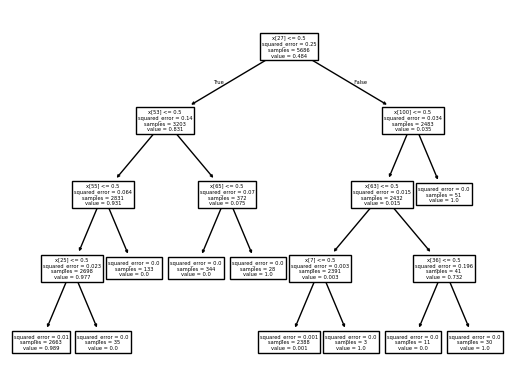

In [18]:
from sklearn.tree import plot_tree
plot_tree(regressor)

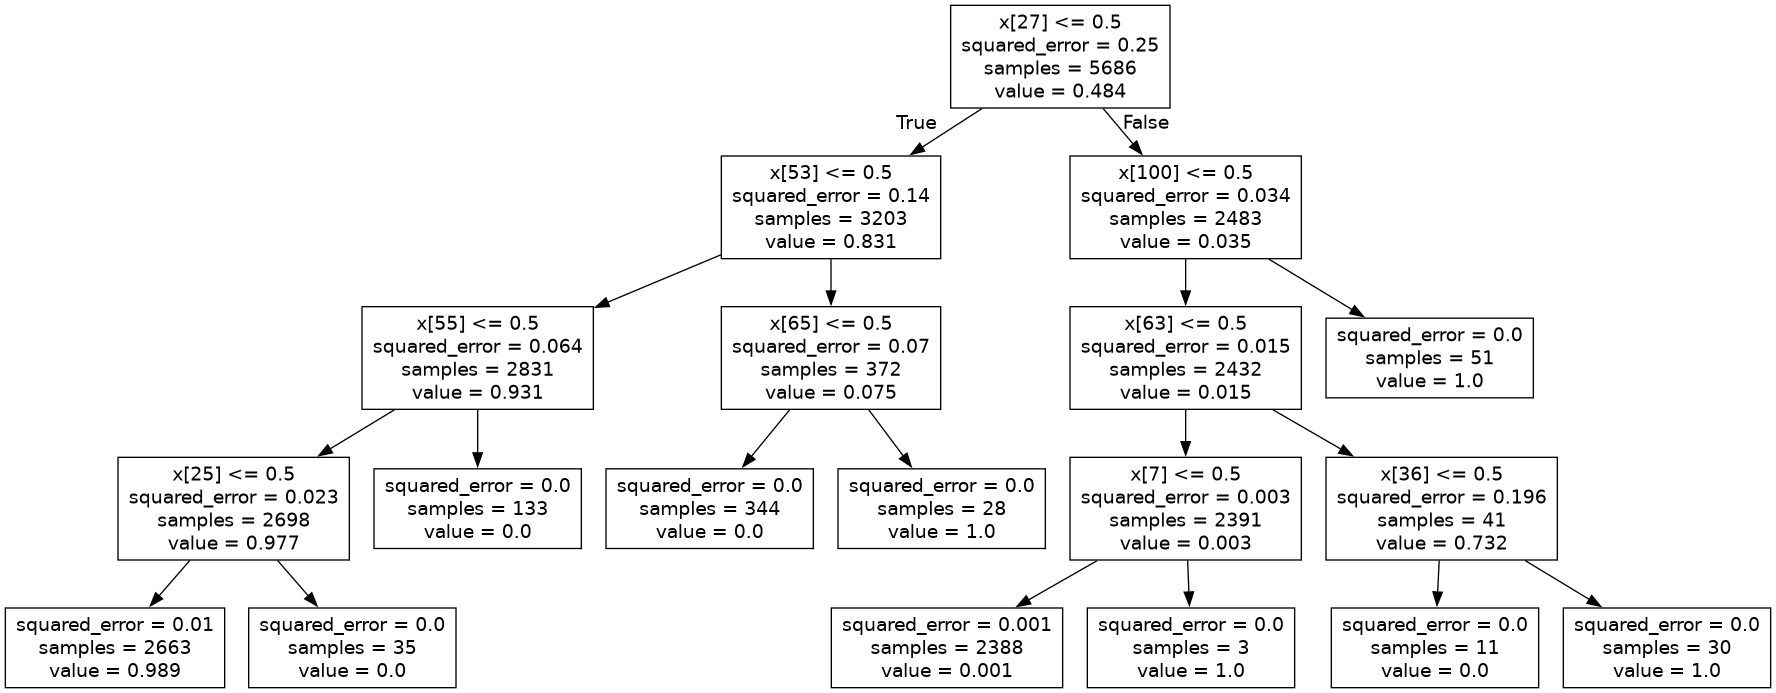

In [ ]:
# Export the decision tree to a dot file and visualize it using pydot

from sklearn.tree import export_graphviz
import pydot
# Export the decision tree to a dot file
export_graphviz(regressor, out_file ='../outputs/6-tree.dot')  
# Use dot file to create a graph
(graph, ) = pydot.graph_from_dot_file('../outputs/6-tree.dot')
# Write graph to a png file
graph.write_png('../outputs/6-tree.png')
# Display the decision tree
from IPython.display import Image
Image(filename='../outputs/6-tree.png')